In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

In [3]:
data = pd.read_csv("SomervilleHappinessSurvey2015.csv")
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
x = torch.tensor(data.iloc[:,1:].values).float()
y = torch.tensor(data.iloc[:,:1].values).float()

In [5]:
model = nn.Sequential(nn.Linear(6, 1),
                      nn.Sigmoid())

In [6]:
loss_function = torch.nn.MSELoss()

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
losses = []
for i in range(100):
    y_pred = model(x)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%10 == 0:
        print(loss.item())

0.4104820489883423
0.26369374990463257
0.2718642055988312
0.26216238737106323
0.2563962936401367
0.2539243996143341
0.2512779235839844
0.2487950623035431
0.24669501185417175
0.24494460225105286


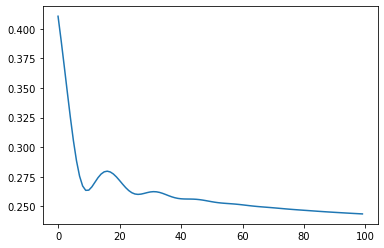

In [9]:
plt.plot(range(0,100), losses)
plt.show()